***In this lab : We will learn how to implement auto-encoder***

Before strating the lab
  1. What is auto-enocoder? 
  2. What are the applications?

We design an auto-enoder that removes the noice from the image and diplays the image in the original form.

Can you explain how we can achieve this?

How many input neuron and how many output neurons?

What is the input and what is the output?




In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GaussianNoise

from tensorflow.keras.datasets import mnist

In [ ]:
#importing the data
#(X_train,y_train),(X_test,y_test) = 

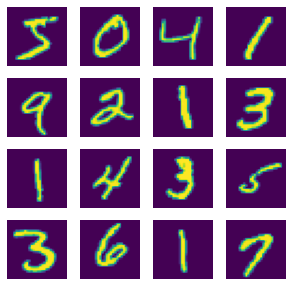

In [ ]:
#plotting the images
plt.figure(figsize=(5,5))

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.axis("off")
  plt.imshow(X_train[i])
plt.show()

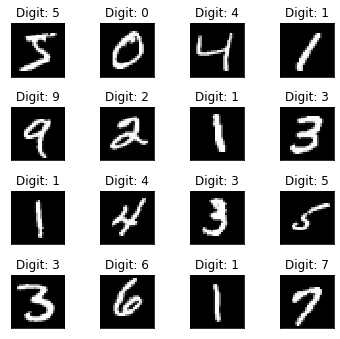

In [ ]:
fig = plt.figure(figsize=(5,5))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

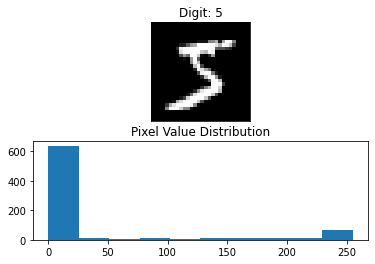

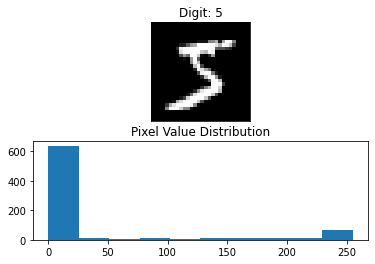

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [ ]:
#normalising the data
#
#

In [ ]:
#introducing the noise in the data
noise = GaussianNoise(0.4)

noisy_image = noise(X_train[:16], training =True)

Actual Image


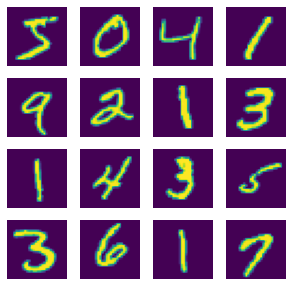

Noisy Image


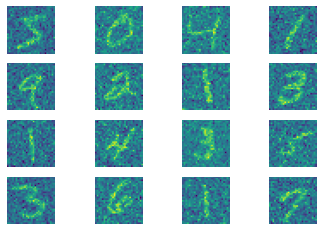

In [ ]:
#plotting actual image and noisy image
plt.figure(figsize=(5,5))

print("Actual Image")
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.axis("off")
  plt.imshow(X_train[i])
plt.show()

print("Noisy Image")
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.axis("off")
  plt.imshow(noisy_image[i])
plt.show()

In [ ]:

#defining units and setting seeds
units = 28*28

tf.random.set_seed(101)

In [ ]:
#building encoder
encoder = Sequential()

encoder.add(Flatten(input_shape = [28,28])) #784
encoder.add(GaussianNoise(0.4))
encoder.add(Dense(392, activation="relu")) #392
encoder.add(Dense(196, activation="relu")) #196
encoder.add(Dense(98, activation="relu")) # 98
encoder.add(Dense(49, activation="relu"))#49
encoder.add(Dense(24, activation="relu"))#24
encoder.add(Dense(12, activation="relu"))#12

In [ ]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 gaussian_noise_1 (GaussianN  (None, 784)              0         
 oise)                                                           
                                                                 
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dense_2 (Dense)             (None, 98)                19306     
                                                                 
 dense_3 (Dense)             (None, 49)                4851      
                                                        

In [ ]:
#building decoder
decoder = Sequential()
decoder.add(Dense(units = 24, input_shape = [12], activation="relu"))
decoder.add(Dense(units = 49, activation="relu"))
decoder.add(Dense(units = 98, activation="relu"))
decoder.add(Dense(units = 196, activation="relu"))
decoder.add(Dense(units = 392, activation="relu"))
decoder.add(Dense(784, activation="sigmoid"))
decoder.add(Reshape([28,28]))

In [ ]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 24)                312       
                                                                 
 dense_7 (Dense)             (None, 49)                1225      
                                                                 
 dense_8 (Dense)             (None, 98)                4900      
                                                                 
 dense_9 (Dense)             (None, 196)               19404     
                                                                 
 dense_10 (Dense)            (None, 392)               77224     
                                                                 
 dense_11 (Dense)            (None, 784)               308112    
                                                                 
 reshape (Reshape)           (None, 28, 28)           

In [ ]:
#combining encoder and decoder
noise_red = Sequential([encoder,decoder])

In [ ]:
#compiling the model
# compile adam
# fit epochs 50

In [ ]:
#creating noisy image
test_noise = noise(X_test[:10], training = True)

In [ ]:
#cleaning the data using model
clean_test_image = noise_red(test_noise)

Original


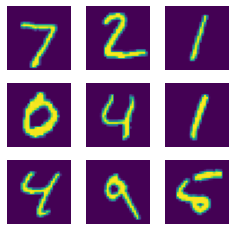

Noisy


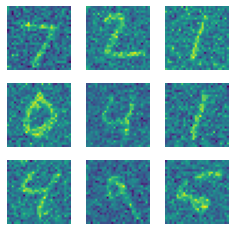

Auto-Encoder Image


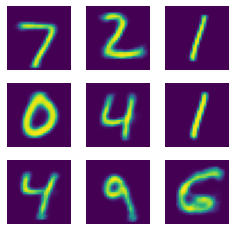

In [ ]:
#printing Actual, Noisy and Image cleaned by the model
print("Original")
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.imshow(X_test[i])
plt.show()

print("Noisy")
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.imshow(test_noise[i])
plt.show()

print("Auto-Encoder Image")
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.imshow(clean_test_image[i])
plt.show()

What did we learn?

1. How to implement auto-encoder?
2. Imlemented an auto-encoder on noisy image input and able to remove the noise from the image.

Homework

Design a classifier that distiguishes the above 9 images from the noisey input.